In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [24]:
def filter_notch(data, filt_val, freq, quality=5):
    b, a = signal.iirnotch(filt_val, quality, freq)
    y = signal.filtfilt(b, a, x=data, axis=0)
    b, a = signal.iirnotch(filt_val*2, quality, freq)
    y = signal.filtfilt(b, a, x=y, axis=0)
    b, a = signal.iirnotch(filt_val*3, quality, freq)
    y = signal.filtfilt(b, a, x=y, axis=0)
    return y
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [4]:
all_dir = np.genfromtxt("./103818_3T_rfMRI_REST1_LR.txt")

In [13]:
1200*0.72

864.0

In [12]:
len(all_dir)*(0.72/9)

864.0

In [19]:
filtered = filter_notch(all_dir, 1/0.72, 1/(0.72/9))

In [21]:
def extract_max_freq(resp_trace, sampling_rate):
    fourier_transform = np.fft.rfft(resp_trace)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
    assert len(power_spectrum) == len(frequency)
    plt.plot(frequency, power_spectrum),
    plt.xlim(0, 1),
    plt.show()
    return frequency[np.argmax(power_spectrum)]

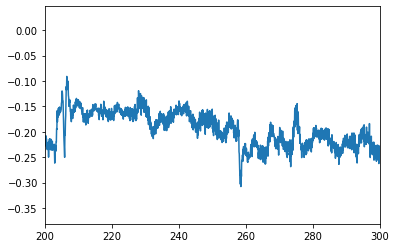

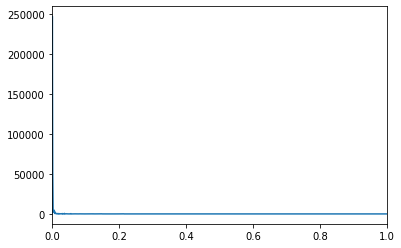

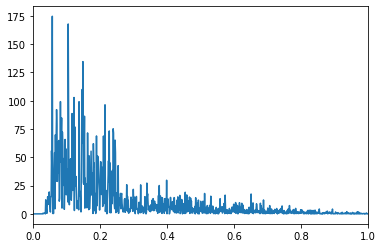

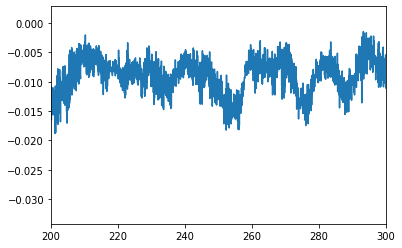

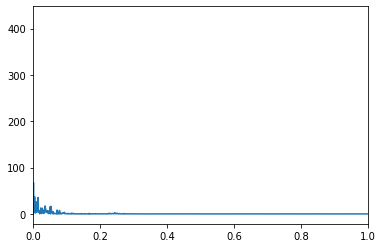

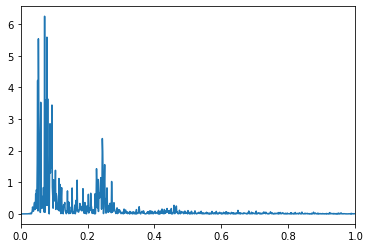

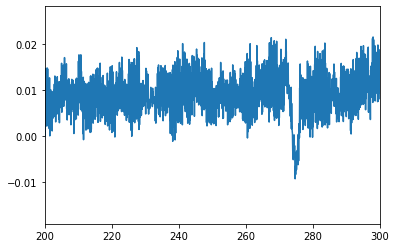

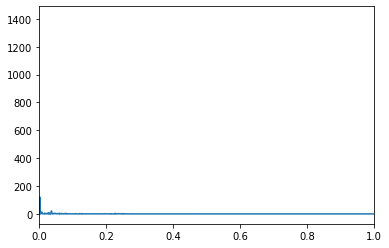

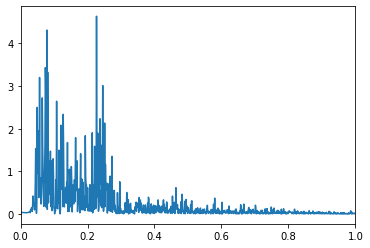

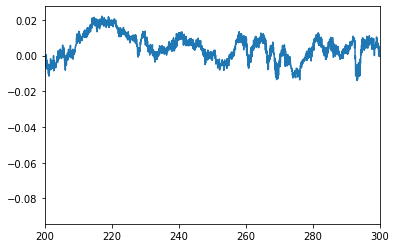

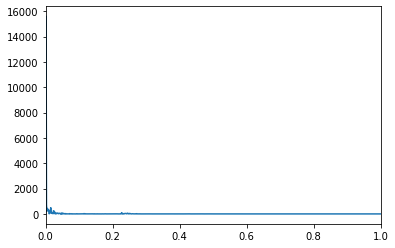

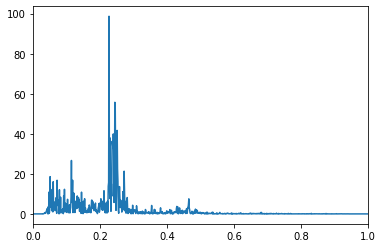

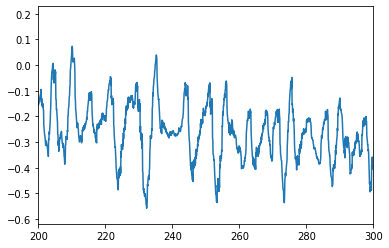

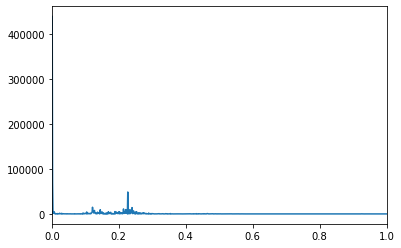

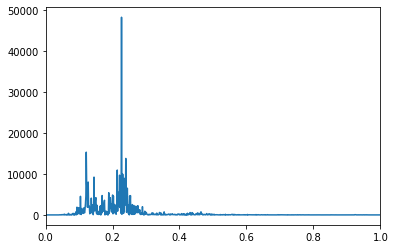

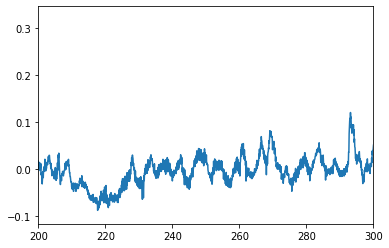

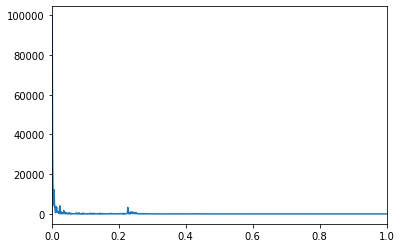

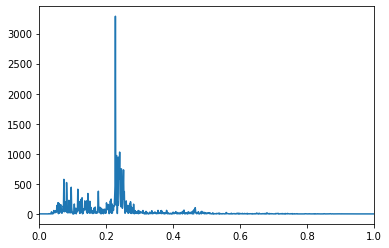

In [25]:
for i in range(6):
    plt.plot(np.arange(0, 864, 0.72/9), filtered[:, i])
    plt.xlim(200,300)
    plt.show()
    f = filtered[:, i]- filtered[:, i].mean()
    extract_max_freq(f, 1/(0.72/9))
    f = butter_bandpass_filter(f, 0.05, 1, 1/(0.72/9), order=3)
    extract_max_freq(f, 1/(0.72/9))